## Lab 3: Part 2 

In [1]:
#import relevant libraries 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
## Mutual excitation values 
def dx(x,y,w=0.4,I = -10): 
    return -x + act(w*y + I)

def dy(y,x,w=0.4,I = -10): 
    return -y + act(w*x + I)

def act(s):
    return 50/(1+np.exp(-s)) 

In [3]:
# Euler Step Function
def euler2Dstep(x,y,dt=0.1, w=0.05,I = -3): 
    return x + dx(x,y)*dt, y + dy(y,x)*dt

# Create Trajectories Via Euler Integration
def euler_integrate(x0,y0,t_vals,dt=0.1): 
    
    #initialize trajectories
    x_traj = np.zeros(len(t_vals)); x_traj[0]=x0
    y_traj = np.zeros(len(t_vals)); y_traj[0]=y0

    #euler step the trajectories 
    for i in range(1,len(t_vals)): 
        x_traj[i],y_traj[i] = euler2Dstep(x_traj[i-1],y_traj[i-1],dt)
        
    return x_traj,y_traj

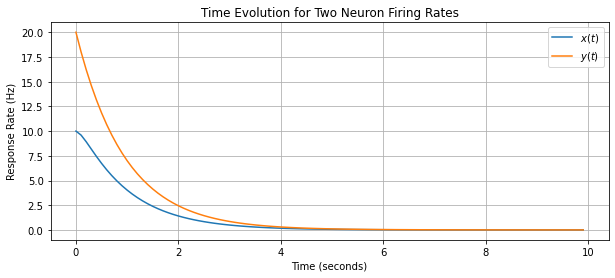

In [4]:
#1.1 Plot the dynamics 

# initial conditions 
x0 = 10 
y0 = 20 
w = 0.4 
I = -10
dt=0.1

#initialize plot 
plt.figure(figsize=(10, 4))

#initialize time and trajectories
t_vals = np.arange(0,10,dt) 
x_traj = np.zeros(len(t_vals)); x_traj[0]=x0
y_traj = np.zeros(len(t_vals)); y_traj[0]=y0

#euler step the trajectories 
for i in range(1,len(t_vals)): 
    x_traj[i],y_traj[i] = euler2Dstep(x_traj[i-1],y_traj[i-1],dt)

plt.plot(t_vals,x_traj,label = "$x(t)$")
plt.plot(t_vals,y_traj,label = "$y(t)$")
plt.xlabel("Time (seconds)"); plt.ylabel("Response Rate (Hz)")
plt.title("Time Evolution for Two Neuron Firing Rates")
plt.grid();plt.legend()
#plt.savefig("figures/2.1.png",dpi=500)
plt.show()

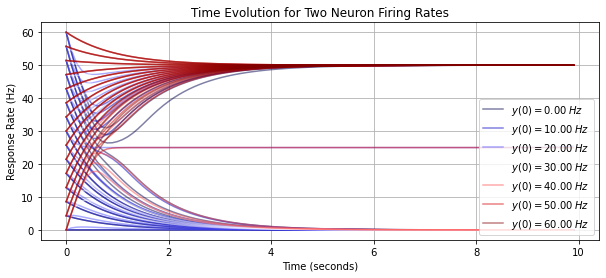

In [5]:
#1.1 Plot the dynamics 

# initial conditions 
x_vals = np.linspace(0,60,15)
y_vals = np.linspace(0,60,7)
w = 0.4 
I = -10

#get colors 
cmap = plt.cm.seismic
values = np.linspace(0, 1, len(y_vals))
colors = [cmap(value) for value in values]

plt.figure(figsize=(10, 4))
for j,y0 in enumerate(y_vals): 
    for i, x0 in enumerate(x_vals):
        #set time 
        dt=0.1
        t_vals = np.arange(0,10,dt) 

        #get trajectories 
        x_traj,y_traj = euler_integrate(x0,y0,t_vals)

        #plot 
        if i == 0: 
            plt.plot(t_vals, x_traj, color = colors[j], 
                     label = f"$y(0) = {y0:.2f} \: Hz$",alpha=0.5) 
        else: 
            plt.plot(t_vals, x_traj, color = colors[j],alpha=0.5)


        
        
plt.xlabel("Time (seconds)"); plt.ylabel("Response Rate (Hz)")
plt.title("Time Evolution for Two Neuron Firing Rates")
plt.grid();plt.legend()
#plt.savefig("figures/2.2.png",dpi=500)
plt.show()

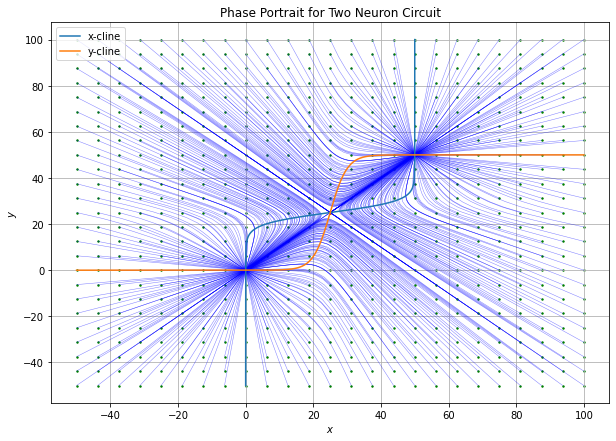

In [6]:
#2.2 State Space 

#Initialize time and initial conditions 
n = 25
x_vals = np.linspace(-50,100,n) 
y_vals = np.linspace(-50,100,n) 
t_vals = np.arange(0,50,dt) 

#set up figure
plt.figure(figsize = (10,7))
i=0
#plot trajectory for each initial condition
for x0 in x_vals:
    for y0 in x_vals: 
        x_traj,y_traj = euler_integrate(x0,y0,t_vals)

        #plot 
        plt.plot(x_traj,y_traj,color='b',linewidth=0.5,alpha=0.5) 
        plt.scatter(x_traj[0],y_traj[0],color='g',s=2)
        plt.scatter(x_traj[-1],y_traj[-1],color='r',s=2)

        
#plot x null-cline 
y_vals = np.linspace(-50,100,1000)
x_vals = act(w*y_vals+I) 
plt.plot(x_vals,y_vals,label="x-cline")

#plot y null-cline 
plt.plot(y_vals,x_vals,label="y-cline") #exploiting symmetry of equation
plt.legend();plt.grid()
plt.xlabel("$x$"); plt.ylabel("$y$") 
plt.title("Phase Portrait for Two Neuron Circuit")
plt.savefig("figures/2.3.png", dpi =500)


In [7]:
#2.3 Find Nullclines - fine 
#plot x null-cline 


49.99773010656488

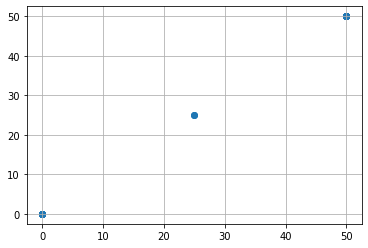

In [8]:
#2.4 Analytic Work 

#Find Fixed points numerically -- use bisection method 
x_vals = np.linspace(-10,100,int(1e6)) 
y_vals = act(w*x_vals + I) 
tol  = 5e-4

#create mask 
mask = np.where(abs(x_vals - y_vals) <= tol) 

plt.scatter(x_vals[mask],y_vals[mask]);plt.grid()
    
x_vals[mask], y_vals[mask] 

act(w*50+I)



In [9]:
#2.5 Analytic 
def partial(x,y,w=0.4,I=-10): 
    s = w*x + I
    sigma = (1/(1+np.exp(-s)))
    return 50*w*sigma*(1-sigma)

def jacobian(x,y):
    
    J = np.array([[-1, partial(x,y)],
                  [partial(y,x), -1]])
    
    return J

J = jacobian(50,50)
np.linalg.det(J)

0.999999175688256

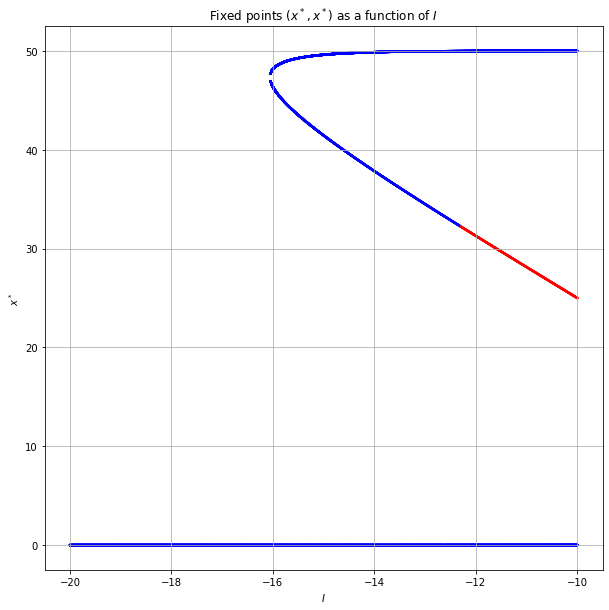

In [42]:
#2.6 Bifurcation Diagram
def stability(x): 
    J = jacobian(x,x)
    det = np.linalg.det(J)

    if det < 0: 
        return 'r' 
    elif det > 0: 
        return 'b'
    else: 
        return 'b' 
I_vals = np.linspace(-20,-10,800) 
num_crossings = np.zeros(len(I_vals)) 
crossings = []
plt.figure(figsize = (10,10))

for I in I_vals: 
    x_vals = np.linspace(-10,100,int(1e6)) 
    y_vals = act(w*x_vals + I) 

    
    mask = np.sqrt(2*(x_vals-y_vals)**2)<1e-3
    masked_vals = x_vals[mask]
    masked_valsy = y_vals[mask] 
    colors = [stability(x) for x in masked_vals]
    plt.scatter(I*np.ones(len(masked_valsy)),masked_vals,color=colors,s=2) 

plt.grid()
plt.xlabel("$I$"); plt.ylabel("$x^*$")
plt.title("Fixed points $(x^*,x^*)$ as a function of $I$")
plt.savefig("figures/2.6.png", dpi =500)



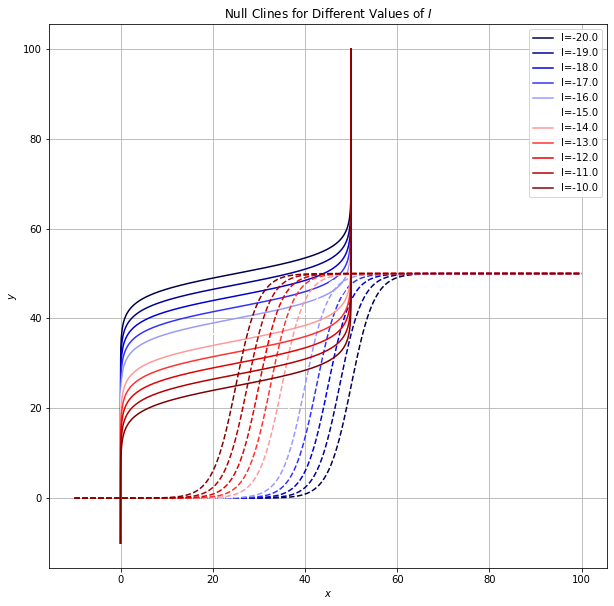

In [23]:
#2.6 Bifurcation Diagram

I_vals = np.linspace(-20,-10,11) 

#create colormap 
cmap = plt.cm.seismic
values = np.linspace(0, 1, len(I_vals))
colors = [cmap(value) for value in values]
plt.figure(figsize = (10,10))

for i,I in enumerate(I_vals): 
    x_vals = np.linspace(-10,100,int(1e6)) 
    y_vals = act(w*x_vals + I) 
    
    plt.plot(x_vals,y_vals,color = colors[i],linestyle='--')
    plt.plot(y_vals,x_vals,color = colors[i], label = f'I={I}')

plt.grid()
plt.xlabel("$x$"); plt.ylabel("$y$")
plt.title("Null Clines for Different Values of $I$")
plt.legend()
plt.savefig("figures/2.62.png", dpi =500)